**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [4]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from examproject import ProblemOne

model1=ProblemOne()

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

We have understood the question, to check if any combination of prices $p1$ and $p2$ in 'linspace(0.1,2.0,10)' clear the labor- good 1- and good 2 market. We have therefor set up functions in 'examproject.py', calculating the clearing conditions difference from 0 (their clearing error) for each condition and at each potential price combination.

In [34]:
p1_val = np.linspace(0.1, 2.0, 10) #Setting up a range with potential p1 values, as given by the assignment
p2_val = np.linspace(0.1, 2.0, 10) #Setting up a range with potential p2 values, as given by the assignment

#Creating empty lists for the error (difference in clearing condition from 0) which will be appended using for-loop
error_labor_clearing = []
error_good1_clearing = []
error_good2_clearing = []

#Forloop appending calculating the error for each of the clearing conditions, for all combinations of p1 and p2.
for p1 in p1_val:
    for p2 in p2_val:
        error_labor = model1.market_clearing_errors(p1, p2)[0]
        good1_error = model1.market_clearing_errors(p1, p2)[1]
        good2_error = model1.market_clearing_errors(p1, p2)[2]
        error_labor_clearing.append({'p1': p1, 'p2': p2, 'error': error_labor})
        error_good1_clearing.append({'p1': p1, 'p2': p2, 'error': good1_error})
        error_good2_clearing.append({'p1': p1, 'p2': p2, 'error': good2_error})

#Turning the lists containing the error terms into dataframes for presentation
df_labor_error = pd.DataFrame(error_labor_clearing)
df_good1_error = pd.DataFrame(error_good1_clearing)
df_good2_error = pd.DataFrame(error_good2_clearing)

#Creating sorted lists from aforementioned dataframes, depending on 'error's difference from zero (ascending)
error_labor_clearing_sorted = sorted(error_labor_clearing, key=lambda x: abs(x['error']))
error_good1_clearing_sorted = sorted(error_good1_clearing, key=lambda x: abs(x['error'])) 
error_good2_clearing_sorted = sorted(error_good2_clearing, key=lambda x: abs(x['error'])) 

#Turning the sorted lists into dataframes for presentation
df_labor_error_sorted = pd.DataFrame(error_labor_clearing_sorted)
df_good1_error_sorted = pd.DataFrame(error_good1_clearing_sorted)
df_good2_error_sorted = pd.DataFrame(error_good2_clearing_sorted)

print('Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the labor market,')
print(' as the error in clearing condition is closest to 0')
display(df_labor_error_sorted[0:10])
print('Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 1,')
print(' as the error in clearing condition is closest to 0')
display(df_good1_error_sorted[0:10])
print('Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 2,')
print(' as the error in clearing condition is closest to 0')
display(df_good2_error_sorted[0:10])

Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the labor market,
 as the error in clearing condition is closest to 0


,p1,p2,error
0,1.155556,1.366667,-0.008482
1,1.366667,1.155556,-0.008482
2,1.788889,0.100000,-0.010592
3,0.100000,1.788889,-0.010592
4,0.311111,1.788889,-0.036577
5,1.788889,0.311111,-0.036577
6,0.733333,1.577778,0.044376
7,1.577778,0.733333,0.044376
8,1.577778,0.944444,-0.061808
9,0.944444,1.577778,-0.061808


Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 1,
 as the error in clearing condition is closest to 0


,p1,p2,error
0,0.944444,1.366667,-0.005856
1,0.944444,1.155556,0.027034
2,0.944444,1.577778,-0.045184
3,1.155556,2.000000,0.049498
4,0.944444,0.944444,0.053793
5,0.944444,0.733333,0.074727
6,0.733333,0.100000,-0.080599
7,0.733333,0.311111,-0.086794
8,0.944444,0.522222,0.090114
9,0.944444,1.788889,-0.091237


Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 2,
 as the error in clearing condition is closest to 0


,p1,p2,error
0,0.100000,1.366667,-0.000420
1,1.788889,1.788889,0.008304
2,0.311111,1.366667,-0.008831
3,1.366667,1.577778,-0.022463
4,0.522222,1.366667,-0.025995
5,1.155556,1.577778,0.026275
6,0.733333,1.366667,-0.052132
7,2.000000,1.788889,-0.060413
8,0.944444,1.577778,0.066221
9,1.577778,1.788889,0.068521


From above tables, we can see, that some price combinations.

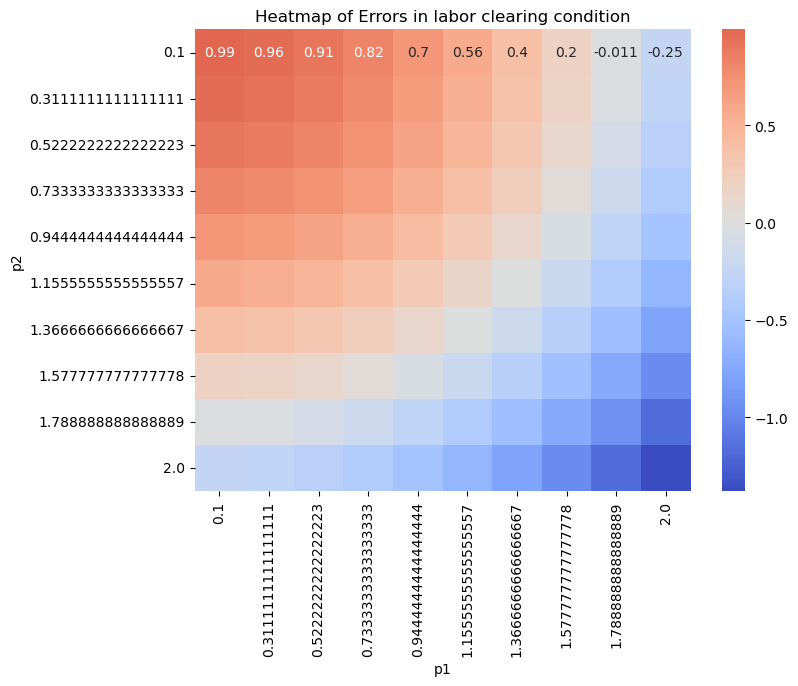

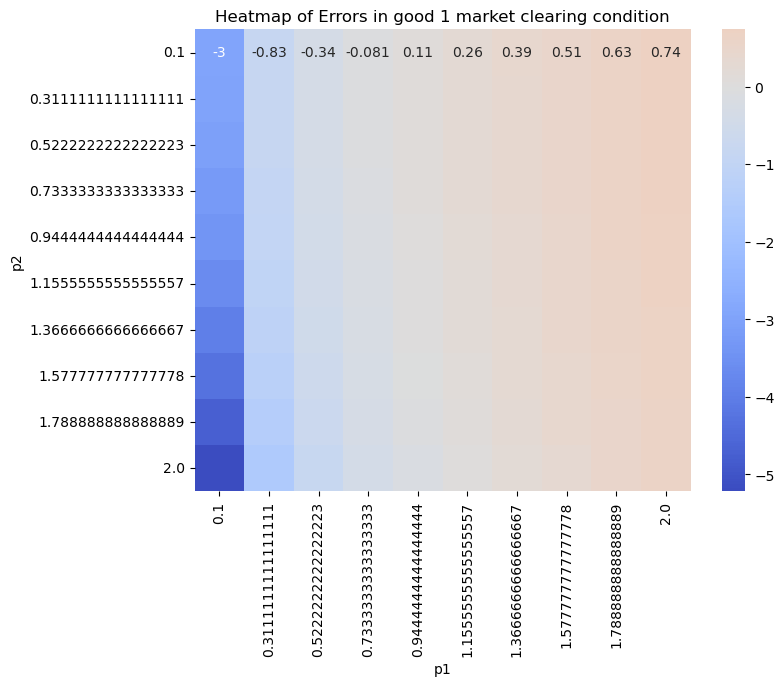

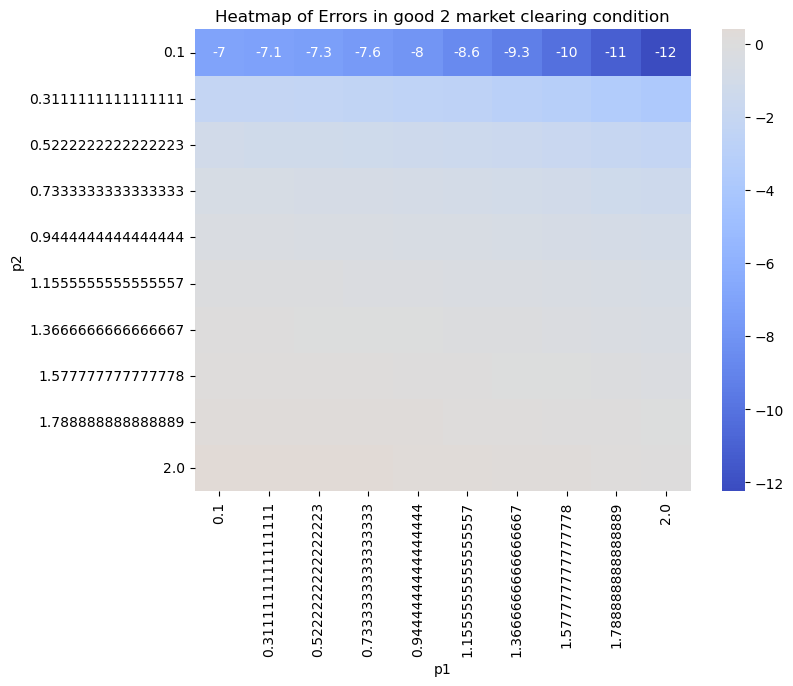

In [6]:
# Pivot the DataFrame to have p1 as columns, p2 as index, and error as values
df_pivot_labor = df_labor_error_sorted.pivot(index='p2', columns='p1', values='error')
df_pivot_good1 = df_good1_error_sorted.pivot(index='p2', columns='p1', values='error')
df_pivot_good2 = df_good2_error_sorted.pivot(index='p2', columns='p1', values='error')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot_labor, annot=True, cmap="coolwarm", center=0)
# Set labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Errors in labor clearing condition')
# Display the heatmap
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot_good1, annot=True, cmap="coolwarm", center=0)
# Set labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Errors in good 1 market clearing condition')
# Display the heatmap
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot_good2, annot=True, cmap="coolwarm", center=0)
# Set labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Errors in good 2 market clearing condition')
# Display the heatmap
plt.show()

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

Using Walras' law, we know that if prices clear 2 out of the 3 clearing conditions, they will clear all three. We will however check all three potential 2 equation systems, using fsolve:

In [7]:
in_guess = [1, 1]
eq_prices_l_1 = fsolve(model1.market_clearing_l_1, in_guess)
print('Solving on the labor- and good 1 conditions, we get:')
print(f'Equilibrium prices: p1 = {eq_prices_l_1[0]}, p2 = {eq_prices_l_1[1]}')

in_guess_2 = [0.5, 1]
eq_prices_l_2 = fsolve(model1.market_clearing_l_2, in_guess_2)
print('Solving on the labor- and good 2 conditions, we get:')
print(f'Equilibrium prices: p1 = {eq_prices_l_2[0]}, p2 = {eq_prices_l_2[1]}')

in_guess_3 = [1, 0.5]
eq_prices_1_2 = fsolve(model1.market_clearing_1_2, in_guess_3)
print('Solving on the good 1- and good 2 conditions, we get:')
print(f'Equilibrium prices: p1 = {eq_prices_1_2[0]}, p2 = {eq_prices_1_2[1]}')


Solving on the labor- and good 1 conditions, we get:
Equilibrium prices: p1 = 0.9759306910499751, p2 = 1.4907587549209786
Solving on the labor- and good 2 conditions, we get:
Equilibrium prices: p1 = 0.9759306910499659, p2 = 1.4907587549222943
Solving on the good 1- and good 2 conditions, we get:
Equilibrium prices: p1 = 0.9759306910483289, p2 = 1.4907587549190537


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [33]:
initial_guess = [0.1, 1.0, 1.0]
bounds = [(0, None), (0, None), (0, None)]

result = minimize(model1.neq_SWF, initial_guess, bounds=bounds)
optimal_tau, optimal_p1, optimal_p2 = result.x

opt_data = { 'Variables' : ['Optimal Tau', 'Optimal T', 'Optimal p1', 'Optimal p2'],
            'Values' : [optimal_tau, optimal_tau * model1.output_opt(optimal_p2), optimal_p1, optimal_p2]}

df_opt_data = pd.DataFrame(opt_data).set_index('Variables')

display(df_opt_data)
print('The found optimal values for tau and thereby T (aswell as the new equilibrium prices) can be seen in the table above')

c:\Users\jacob\OneDrive\Skrivebord\Intro. to prog & Num. Analysis\projects-2024-thomas-lucas-jacob-1\examproject\examproject.py:144: RuntimeWarning: divide by zero encountered in scalar divide
  T = tau / self.output_opt(p2)
c:\Users\jacob\OneDrive\Skrivebord\Intro. to prog & Num. Analysis\projects-2024-thomas-lucas-jacob-1\examproject\examproject.py:131: RuntimeWarning: divide by zero encountered in scalar divide
  T = tau / self.output_opt(p2)
c:\Users\jacob\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2305: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
c:\Users\jacob\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2306: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)
c:\Users\jacob\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


,Values
Variables,
Optimal Tau,0.785526
Optimal T,0.201063
Optimal p1,1.030472
Optimal p2,0.511920


The found optimal values for tau and thereby T (aswell as the new equilibrium prices) can be seen in the table above


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [9]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [10]:
# Import the calculate_utilities function from the utility_calculations module
from examproject2 import calculate_utilities

# Calculate the utilities
results = calculate_utilities()

# Display the results
print("Expected Utilities:", results.expected_utilities)
print("Realized Utilities:", results.realized_utilities)


Expected Utilities: [1 2 3]
Realized Utilities: [1.00469392 2.04649359 2.9966981 ]


The expected utility is 1, 2 and 3 because the expected value of the error term is 0.

The realised utility based on 10000 simulations with an error term that is normal distributed with mean of 0 and variance of 4 returns a realised utility of 1.005, 2.047 and 2.997


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

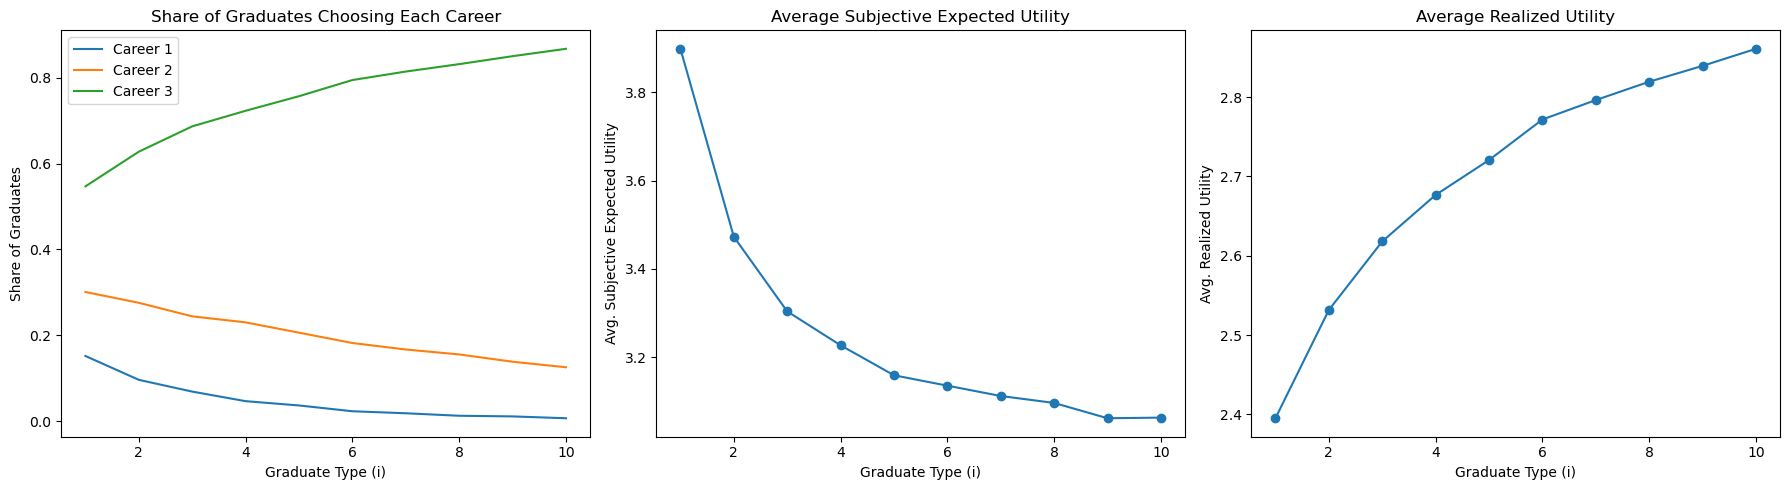

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from examproject2 import simulate_career_choices

# Assuming simulate_career_choices() returns share_graduates, avg_subjective_util, avg_realized_util
share_graduates, avg_subjective_util, avg_realized_util = simulate_career_choices()

# Visualize the results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Share of graduates choosing each career
for j in range(3):
    ax[0].plot(range(1, 11), share_graduates[:, j], label=f'Career {j+1}')
ax[0].set_xlabel('Graduate Type (i)')
ax[0].set_ylabel('Share of Graduates')
ax[0].set_title('Share of Graduates Choosing Each Career')
ax[0].legend()

# Average subjective expected utility
ax[1].plot(range(1, 11), avg_subjective_util, marker='o')
ax[1].set_xlabel('Graduate Type (i)')
ax[1].set_ylabel('Avg. Subjective Expected Utility')
ax[1].set_title('Average Subjective Expected Utility')

# Average realized utility
ax[2].plot(range(1, 11), avg_realized_util, marker='o')
ax[2].set_xlabel('Graduate Type (i)')
ax[2].set_ylabel('Avg. Realized Utility')
ax[2].set_title('Average Realized Utility')

plt.tight_layout()
plt.show()


# Conclusion to question 2

In figure 1, shares of graduates choosing each career, we see that as graduates type i goes towards 10 then they are more likely to choose career j=3, as that is the career that has the highest expected utility and with more friends to observe and to base their career decision on, the more likely they are to choose the "correct" career which nets an average utility of 3.

In figure 2, average subjective expected utility, we see that as graduate type i goes towards 10, they are less likely to expect higher utility. This is because as i=10 has 10 times more friends to base their expected utility on than i=1, which means they observe a more "realistic" picture of utility they can expect. And as i goes towards infinity the expected utility goes towards three, which is the expected utility of career 3.

In figure 3, we see that the average realized utility increases as graduate type i goes towards 10, as they are more likely to pick a "correct" career that gives utility of 3. This is because they have more friends to base their decision on and i=10 have 10 friends in all three careers so they are most likely to pick career 3 which increases their average realizied utility.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [12]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [13]:
# Generate random points:

# Set the random seed for reproductability:
rng = np.random.default_rng(2024)

# Generate (50) random points in the unit square X:
X = rng.uniform(size=(50,2))
# Define the target point y:
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

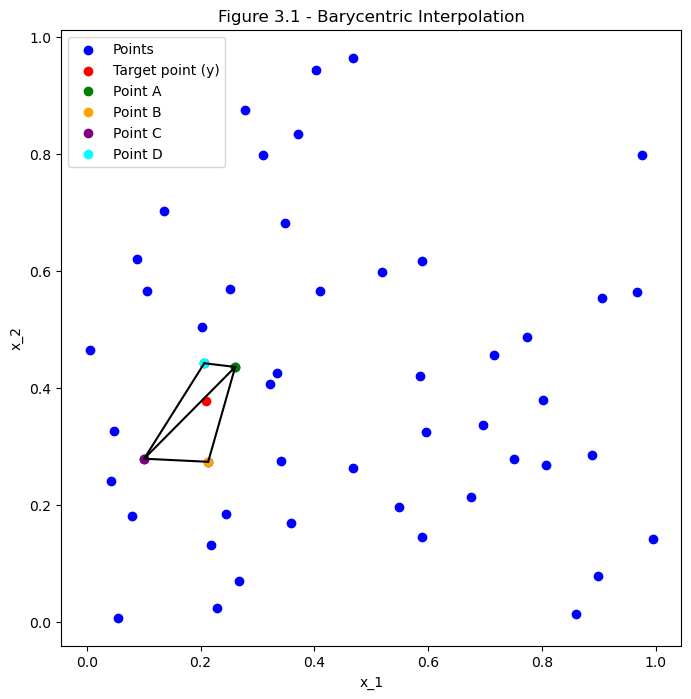

In [14]:
# We now define the points A,B,C and D:

# We use "np.linalg.norm(x - y)" as it is the same as writing the Euclidean distance between two points. 
# So the Euclidean in the functions, we instead compute using numpy.
def points(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y))
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y))
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y))
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y))
    return A, B, C, D
A, B, C, D = points(X, y)

# Plot the points and the triangles:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points')
plt.scatter(*y, c='red', label='Target point (y)')
plt.scatter(*A, c='green', label='Point A')
plt.scatter(*B, c='orange', label='Point B')
plt.scatter(*C, c='purple', label='Point C')
plt.scatter(*D, c='cyan', label='Point D')

# Drawing triangles:
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')

# Giving axis titles and figure header:
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.title('Figure 3.1 - Barycentric Interpolation')
plt.show()

**Conclusion to question 3.1**\
From the figure 3.1 above, we can see the set of random points in the unit square (blue dots). We can also see point y (red dot) and the other colored dots representing the points A, B, C and D that are the corners in the two triangles ABC and CDA. It is possible to see that point y is located within triangle ABC as will be calculated precisely in the next question.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [15]:
# Now that we have defined the points we can define the Barycentric coordinates as per the question:
def barycentric_coordinates(A, B, C, y):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# The Barycentric coordinates of y wrt. the triangle ABC:
r1ABC, r2ABC, r3ABC = barycentric_coordinates(A, B, C, y)
print("Barycentric coordinates of point y wrt. triangle ABC:", r1ABC, r2ABC, r3ABC)
# The Barycentric coordinates of y wrt. the triangle CDA:
r1CDA, r2CDA, r3CDA = barycentric_coordinates(C, D, A, y)
print("Barycentric coordinates of point y wrt. triangle CDA:",r1CDA, r2CDA, r3CDA)

# Defining function that checks whether point y is in a given triangle:
def is_y_in_triangle(r1, r2, r3):
    return (0 <= r1 <= 1) and (0 <= r2 <= 1) and (0 <= r3 <= 1)

# Check which triangle contains y and compute the interpolated value
if is_y_in_triangle(r1ABC, r2ABC, r3ABC):
    print("Point y is located inside triangle ABC.")
elif is_y_in_triangle(r1CDA, r2CDA, r3CDA):
    print("Point y is located inside triangle CDA.")
else:
    print("Point y is outside both triangles." " The interpolated value is =", np.nan)

Barycentric coordinates of point y wrt. triangle ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates of point y wrt. triangle CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054
Point y is located inside triangle ABC.


**Conclusion to question 3.2:** The point y is located in the triangle ABC. 
\
\
As it can be seen the Barycentric coordinates for triangle CDA doesn't fulfill the conditions; r1CDA ∈ [0,1], r2CDA ∈ [0,1] and r3CDA ∈ [0,1] as r2CDA is negative. Therefore the point y can't be inside the triangle.
\
\
For the triangle ABC all coordinates are within the interval and therefore the point y is inside this triangle. This is also possible to see as we plottet the triangles and points in Question 1.

**Now consider the function:**
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [16]:
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

[0.26071605 0.43635845] [0.21315735 0.274245  ] [0.10056103 0.27951775] [0.20634391 0.44272557]
Interpolated value: 0.08405201731052576
True value: 0.0789565216259594


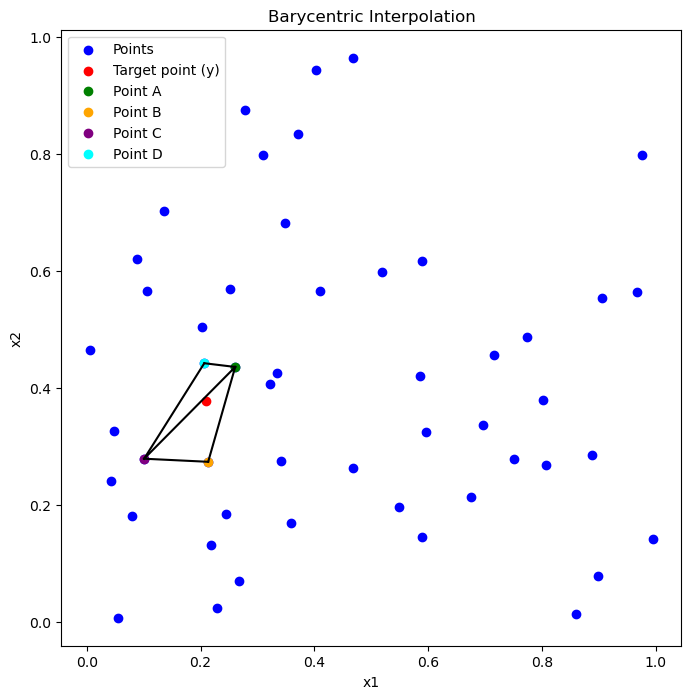

Barycentric coordinates for triangle ABC: r1ABC = 0.6286263152916166, r2ABC = 0.06910145494351515, r3ABC = 0.3022722297648682
Barycentric coordinates for triangle CDA: r1CDA = 0.3682598757102867, r2CDA = -0.13392661883334067, r3CDA = 0.765666743123054


In [17]:
def find_points(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    return A, B, C, D

A,B,C,D = find_points(X,y)

print(A,B,C,D)

def barycentric_coordinates(A, B, C, y):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

def interpolate(y, A, B, C, D, F):
    r1ABC, r2ABC, r3ABC = barycentric_coordinates(A, B, C, y)
    if all(0 <= r <= 1 for r in [r1ABC, r2ABC, r3ABC]):
        return r1ABC * f(A) + r2ABC * f(B) + r3ABC * f(C)

    r1CDA, r2CDA, r3CDA = barycentric_coordinates(C, D, A, y)
    if all(0 <= r <= 1 for r in [r1CDA, r2CDA, r3CDA]):
        return r1CDA * f(C) + r2CDA * f(D) + r3CDA * f(A)

    return np.nan

# Calculate the interpolated value
interpolated_value = interpolate(y, A, B, C, D, F)

# Compare with the true value
true_value = f(y)

# Print the results
print(f"Interpolated value: {interpolated_value}")
print(f"True value: {true_value}")

# Plot the points and the triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points')
plt.scatter(*y, c='red', label='Target point (y)')
plt.scatter(*A, c='green', label='Point A')
plt.scatter(*B, c='orange', label='Point B')
plt.scatter(*C, c='purple', label='Point C')
plt.scatter(*D, c='cyan', label='Point D')

# Draw triangles
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Barycentric Interpolation')
plt.show()

# Print the results for verification
print(f"Barycentric coordinates for triangle ABC: r1ABC = {r1ABC}, r2ABC = {r2ABC}, r3ABC = {r3ABC}")
print(f"Barycentric coordinates for triangle CDA: r1CDA = {r1CDA}, r2CDA = {r2CDA}, r3CDA = {r3CDA}")


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [18]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [19]:
# write your answer here